# Ejercicios Pair Programming - Modulo 2 - Sprint 1 
## Lección 5 - Visualización I: Matplotlib
### Judith Mellidez y Sonia Ruiz

Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas columnas de nuestro csv.

Hoy realizaremos una serie de gráficas usando la librería de matplotlib para familiarizarnos un poco con los datos.

📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.

Tendréis que realizar gráficas para contestar a las siguientes preguntas:
1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [1]:
#Importamos las librerias necesarias:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Creamos un dataframe a partir de un archivo .csv .
df=pd.read_csv('../pandas/Data_lecc4_pandas/attacks_lec4.csv')
df.head()

,Unnamed: 0,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo
0,0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI
1,6,2018.06.03.a,6,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI
2,8,2018.05.26.b,8,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI
3,10,2018.05.24,10,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Morning,Grey reef shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI
4,13,2018.05.13.a,13,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,08h15,Invalid incident,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI


In [5]:
#Obtenemos la forma del dataframe para saber el numero de filas y columnas que tiene.
df_shape=df.shape
print('El dataframe tiene',df_shape[0],'filas y ',df_shape[1],'columnas')

El dataframe tiene 1502 filas y  16 columnas


In [6]:
#Creamos una variable con los nombres de las columnas del dataframe.
df_columns=df.columns
df_columns

Index(['Unnamed: 0', 'case_number', 'unnamed:_0', 'year', 'type', 'country',
       'area', 'location', 'activity', 'name', 'sex_', 'age', 'time',
       'species_', 'href', 'siglo'],
      dtype='object')

In [7]:
#Obtenemos todas las columnas del dtaframe junto con el numero de valores no nulos que contienen
#  y el tipo de datos de que presentan.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1502 non-null   int64  
 1   case_number  1502 non-null   object 
 2   unnamed:_0   1502 non-null   int64  
 3   year         1502 non-null   float64
 4   type         1502 non-null   object 
 5   country      1502 non-null   object 
 6   area         1502 non-null   object 
 7   location     1502 non-null   object 
 8   activity     1502 non-null   object 
 9   name         1502 non-null   object 
 10  sex_         1502 non-null   object 
 11  age          1502 non-null   object 
 12  time         1502 non-null   object 
 13  species_     1502 non-null   object 
 14  href         1502 non-null   object 
 15  siglo        1502 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 187.9+ KB


In [8]:
#Obtenemos una tabla con los principales analisis estadisticos de las columnas del dataframe
#  con variables numericas.
df.describe()

,Unnamed: 0,unnamed:_0,year
count,1502.000000,1502.000000,1502.000000
mean,2162.768309,2169.600533,1991.604527
std,1332.991575,1336.383393,23.489506
min,0.000000,0.000000,1868.000000
25%,1091.250000,1096.250000,1978.000000
50%,1965.000000,1972.000000,2001.000000
75%,3102.000000,3112.000000,2009.000000
max,5905.000000,5922.000000,2018.000000


In [5]:
#Obtenemos los valores unicos de la columna "sex_" y el numero de filas que presentan cada valor.
df_frec_sex=df['sex_'].value_counts()
df_frec_sex

M      1294
F       207
lli       1
Name: sex_, dtype: int64

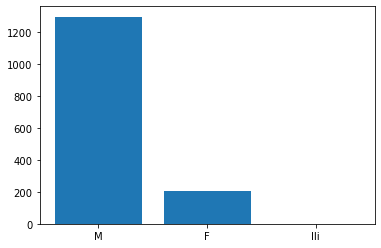

In [10]:
#Realizamos un diagrama de barras (bar plot) para mostrar las frecuencias de cada categoria
#  presente en la columna "sex_" de nuestro dataframe.
x=df_frec_sex.index
y=df_frec_sex.values
plt.figure()
plt.bar(x,y)
plt.show()

    - En este diagrama podemos ver que la categoria M es la mas numerosa.

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación. (https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm)

In [11]:
df_nulos=df.isna().sum()
df_nulos
#no calculamos el porcentaje de nulos por columna (porcentajes=(df.isna().sum())/(df.isna().sum().sum())*100)
#  porque no hay ningun nulo en las columnas. Tomamos los datos ceros como dato para el piechart.


Unnamed: 0     0
case_number    0
unnamed:_0     0
year           0
type           0
country        0
area           0
location       0
activity       0
name           0
sex_           0
age            0
time           0
species_       0
href           0
siglo          0
dtype: int64

In [12]:
df_nulos/df.shape[0]*100

Unnamed: 0     0.0
case_number    0.0
unnamed:_0     0.0
year           0.0
type           0.0
country        0.0
area           0.0
location       0.0
activity       0.0
name           0.0
sex_           0.0
age            0.0
time           0.0
species_       0.0
href           0.0
siglo          0.0
dtype: float64

/var/folders/f0/204ksvss62b9dwtcgg8q17540000gn/T/ipykernel_5274/3754034225.py:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(df_nulos,labels=variables,autopct='%1.2f%%')


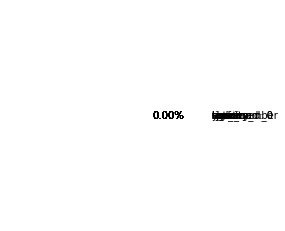

In [13]:
variables=['Unnamed: 0', 'case_number', 'unnamed:_0', 'year', 'type', 'country',
       'area', 'location', 'activity', 'name', 'sex_', 'age', 'time',
       'species_', 'href', 'siglo']
       #lo hemos copiado de la variable df_columns, aunque podriamos haber ejecutado aqui otra vez el
       #  codigo df.columns
plt.figure()
plt.pie(df_nulos,labels=variables,autopct='%1.2f%%')
plt.show()

    - el piechart no muestra nada ya que no tenemos ningun valor nulo en ninguna de sus variables.

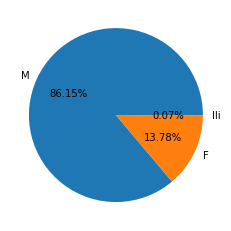

In [8]:
#Para mostras un ejemplo de piechart que si represente valores del dataframe podemos tomar
#  la columna "sex_" de nuevo y asi ver un ejemplo de un grafico de sectores.
plt.figure()
plt.pie(df_frec_sex,labels=df_frec_sex.index,autopct='%1.2f%%')
plt.show()

    - En este diagrama vemos que el 86,15% de los datos corresponden a "M" (hombres), 13,78% a "F" (mujeres) y el 0,07% a "lli" (variable que debemos analizar si eliminamos ese registro).

3. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [14]:
#Obtenemos los principales estadisticos de las columnas con valores categoricos y transponemos
#  la tabla obtenida. Guardamos en otra variable los valores unicos que tiene cada columna del dataframe.
df_describe=df.describe(include='object').T
df_cat_unique=df_describe['unique']
df_cat_unique

case_number    1502
type              5
country          64
area            186
location       1208
activity        347
name           1426
sex_              3
age              92
time            248
species_        834
href           1502
siglo             2
Name: unique, dtype: object

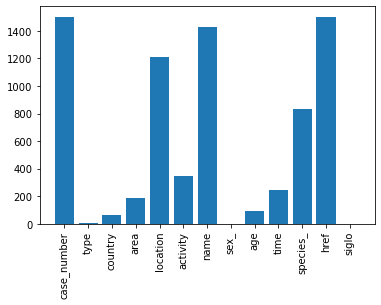

In [15]:
#Representamos en un diagrama de barras el valor de valores unicos que tiene cada columna. Representando
#  en el eje X los nombres de las columnas y en el eje Y la cantidad de valores unicos de cada una.
x=df_cat_unique.index
y=df_cat_unique.values
plt.figure()
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()

    - Podemos observar que las columnas con mayor numero de valores unicos son "case_number" (ya que tiene esta columna como tipo object), "name" y "href". Y las que menos "type", "sex_" y "siglo".

4. Filtrad los datos para quedarnos solo con los datos de USA.
- ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

<Figure size 1440x360 with 0 Axes>

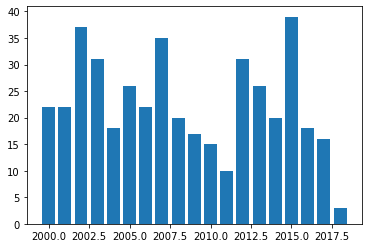

In [22]:
#Mostramos en un diagrama de barras los ataques de tiburones que han ocurrido en "USA" desde
#  el año 2000 (incluido).
plt.figure(figsize=(20,5))
df_USA=df[df['country']=='USA']['year'].value_counts()

x=df_USA[df_USA.index>=2000].index
y=df_USA[df_USA.index>=2000].values

plt.figure()
plt.bar(x,y)

plt.show()

    - Podemos ver que los años donde ocurrieron mas ataques en "USA" desde el 2000 fueron en el 2015, seguido de 2002 y 2007.

- En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [34]:
#Creamos un dataframe con los ataques de tiburones ocurridos en "USA".
df_USA_type=df[df['country']=='USA']

In [38]:
#Obtenemos los nombres de las columans del dataframe que acabamos de obtener.
df_USA_type.columns

Index(['Unnamed: 0', 'case_number', 'unnamed:_0', 'year', 'type', 'country',
       'area', 'location', 'activity', 'name', 'sex_', 'age', 'time',
       'species_', 'href', 'siglo'],
      dtype='object')

In [37]:
#Mostramos las 5 primeras filas del dataframe creado.
df_USA_type.head(5)

,Unnamed: 0,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo
0,0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI
2,8,2018.05.26.b,8,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI
10,35,2018.03.31,35,2018.0,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,25,09h30,"Tiger shark, 12'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI
17,53,2017.12.31,53,2017.0,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjorie Mariano,F,54,18h00,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI
18,60,2017.11.24,60,2017.0,Unprovoked,USA,California,"Stillwater Cove, Monterey County",Spearfishing,Grigor Azatian,M,25,13h45,"White shark, 4.6 m",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI


In [39]:
#Obtenemos un recuento del nuero de filas qeu presentan cada valor unico de la columna "type" en
#  el datafrem con los valores de "USA".
df_USA_type['type'].value_counts()

Unprovoked      612
Provoked         48
Invalid          47
Boating          11
Sea Disaster      1
Name: type, dtype: int64

In [40]:
#Obtenemos la lista de los valores unicos de la columna "type" del dataframe.
df_USA_type['type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Sea Disaster'],
      dtype=object)

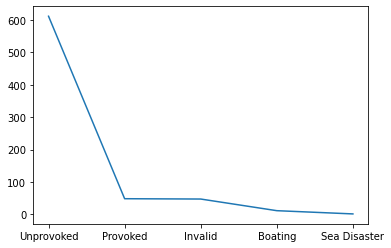

In [41]:
#Creamos una grafica lineal los valores unicos de la columna "type" del dataframe y sus frecuencias.
#Hemos ultizado el metodo '.index' para obtener los inidices de los value_counts() en el
#  mismo orden de sus valores y sea correlativo con el eje y.
plt.figure()

x=df_USA_type['type'].value_counts().index
y=df_USA_type['type'].value_counts()

plt.plot(x,y)
plt.show()

    - En el grafico podemos observar que la mayoria de ataques ocurridos en este dataframe fueron de tipo "Unprovoked".

5. Filtrad los datos para Spain:
- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

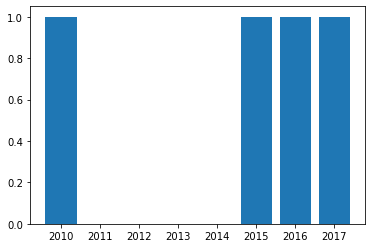

In [56]:
#Creamos un diagrama de barras con los valores de los ataque de tiburones ocurridos
#  en "SPAIN" dividos en años.
plt.figure()

df_SPAIN=df[df['country']=='SPAIN']['year'].value_counts()

x=df_SPAIN[df_SPAIN.index>=2000].index
y=df_SPAIN[df_SPAIN.index>=2000].values

plt.bar(x,y)
plt.show()

    - En el gráfico podemos observar que los 4 ataques de tiburones, que ocrrieron en "SPAIN" a partir del año 2000, ocurrieron cada ataque en un año distinto.

In [51]:
#Mostramos los ataques ocurridos en "SPAIN" cada año.
df_SPAIN.head()

2017.0    1
2016.0    1
2015.0    1
2010.0    1
1993.0    1
Name: year, dtype: int64

- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [52]:
#Creamos un dataframe con los ataques de tiburones ocurridos en "SPAIN".
df_SPAIN_type= df[df['country']=='SPAIN']

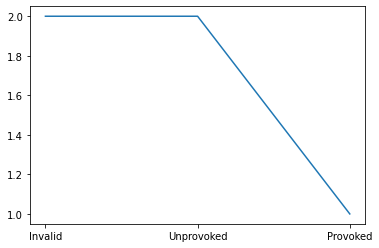

In [53]:
#Creamos una grafica lineal con los tipos de ataques de tiburones ocurridos en "SPAIN" y el numero
#  de casos de cada tipo.
plt.figure()

x=df_SPAIN_type['type'].value_counts().index
y=df_SPAIN_type['type'].value_counts()

plt.plot(x,y)
plt.show()

    - En este diagrama podemos ver que de tipo "Invalid" hubo 2 ataques, de tipo "Unprovoked" hubo 2 ataques y de tipo "Provoked" hubo 1 ataque.

In [54]:
#Mostramos el datarame con los ataques de tiburones ocurridos en "SPAIN", donde podemos comprobar
#  que se corresponde con lo representado en la grafica.
df_SPAIN_type.head()

,Unnamed: 0,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo
29,98,2017.08.26.b,98,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI
59,233,2016.07.29,234,2016.0,Unprovoked,SPAIN,Alicante Province,Arenales del Sol,Swimming,male,M,40,11h30,Blue shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI
112,377,2015.08.18.a,378,2015.0,Invalid,SPAIN,Alicante,"Poniente Beach, Benidorm",Swimming,male,M,10,11h00,Shark involvement not confirmed,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI
341,1007,2010.07.16.b,1011,2010.0,Provoked,SPAIN,Grand Canary Island,"Sardina del Norte, Gáldar",Swimming,male,M,9,19h15,Angel shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI
917,2469,1993.09.03,2476,1993.0,Unprovoked,SPAIN,Costa Blanca,"Playa de las Arenas, Valencia",Swimming,Jorge Durich Heredia (or Hernandez),M,69,08h00,1.2 m [4'] shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XX


Happy coding 🦈